In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [44]:
df=pd.read_csv('/home/mxie3/pythonproject/WhiteDelete.csv')

In [45]:
df.tail(2)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
3992            5.5              0.29         0.30             1.1      0.022   
3993            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
3992                 20.0                 110.0  0.98869  3.34       0.38   
3993                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  Color  
3992     12.8        7  white  
3993     11.8        6  white

In [46]:
type(df)

pandas.core.frame.DataFrame

In [47]:
df.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3994.000000       3994.000000  3994.000000     3994.000000   
mean        6.808851          0.264188     0.324246        6.381272   
std         0.726035          0.076255     0.086149        4.933833   
min         4.900000          0.080000     0.100000        0.600000   
25%         6.300000          0.210000     0.270000        1.800000   
50%         6.800000          0.260000     0.310000        5.200000   
75%         7.300000          0.310000     0.370000        9.700000   
max         8.700000          0.485000     0.570000       22.000000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3994.000000          3994.000000           3994.000000  3994.000000   
mean      0.042376            34.780295            137.110165     0.993866   
std       0.009875            15.000780             41.110967     0.002888   
min       0.016000             2.000000             21.000000     0.987110   
25%       0.035000            24.000000            107.000000     0.991600   
50%       0.042000            34.000000            133.000000     0.993570   
75%       0.049000            45.000000            166.000000     0.995900   
max       0.071000            80.000000            255.000000     1.001960   

                pH    sulphates      alcohol      quality  
count  3994.000000  3994.000000  3994.000000  3994.000000  
mean      3.187814     0.481372    10.580178     5.948172  
std       0.137697     0.098904     1.214028     0.855482  
min       2.830000     0.220000     8.400000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.500000     6.000000  
75%       3.280000     0.540000    11.400000     6.000000  
max       3.560000     0.760000    14.200000     9.000000

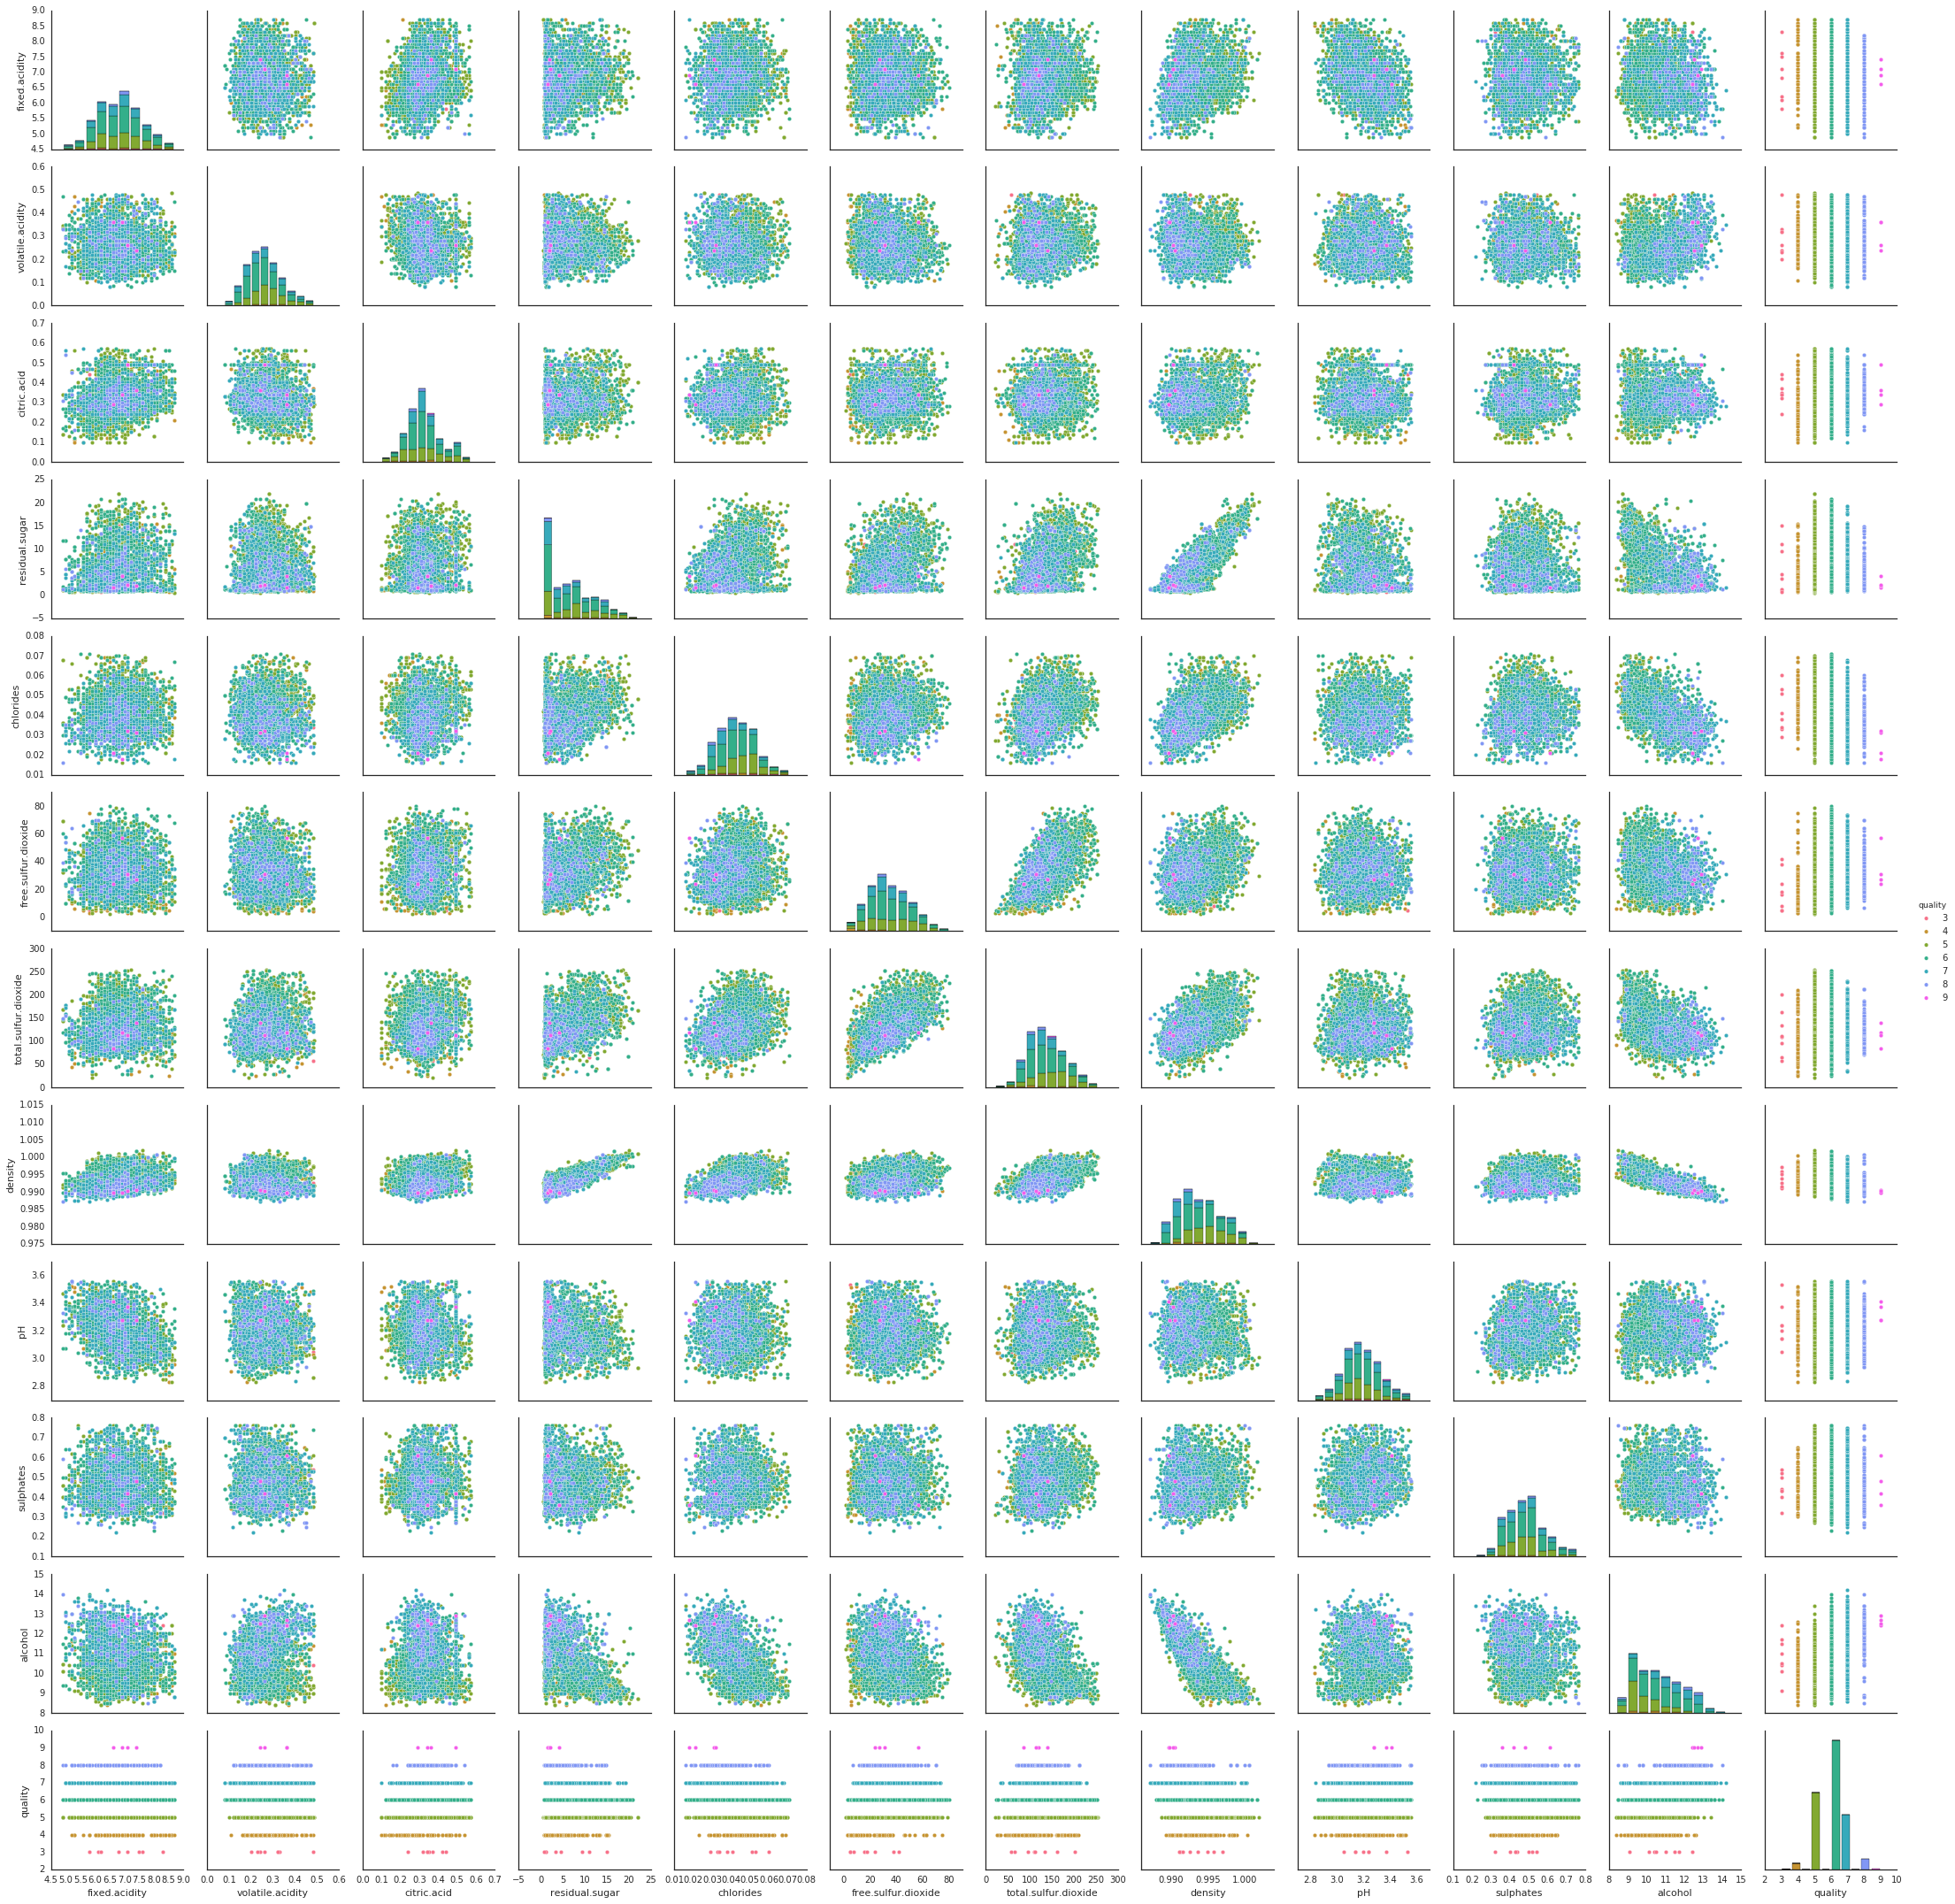

In [43]:
%matplotlib inline
sb.pairplot(df, hue='quality')

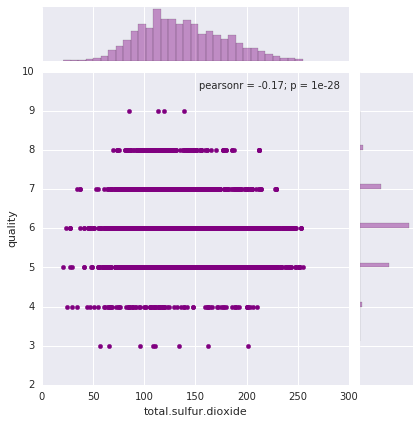

In [5]:
%matplotlib inline
sb.jointplot(x='total.sulfur.dioxide',y='quality',data=df,color='purple')

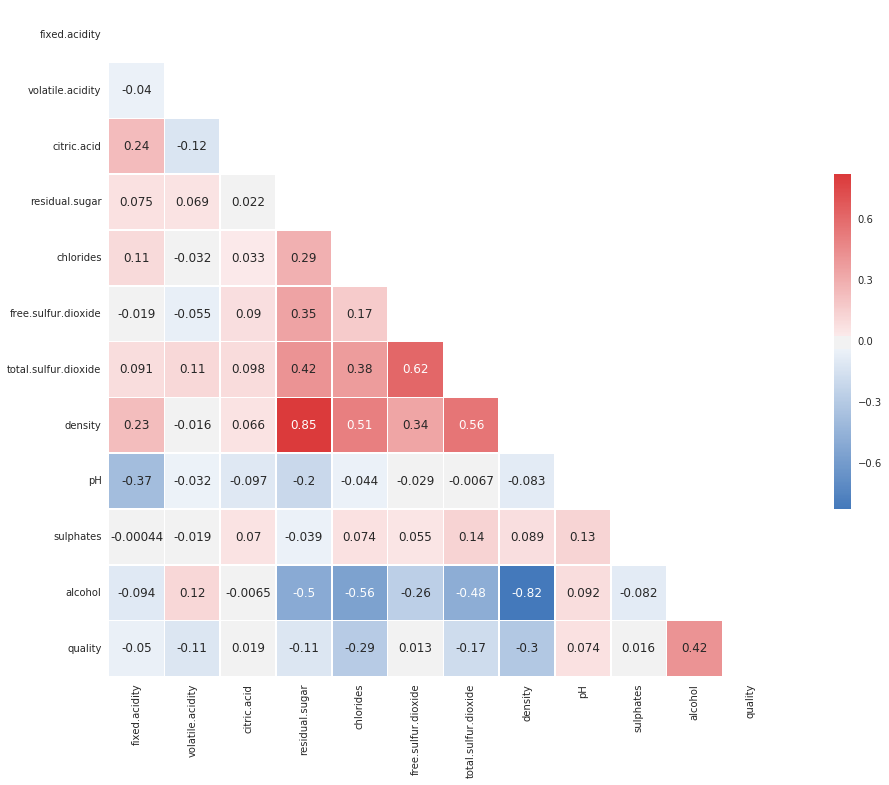

In [44]:
#corr = df.corr()
#sb.heatmap(corr,annot=True,
            #xticklabels=corr.columns.values,
            #yticklabels=corr.columns.values).figure.tight_layout()

sb.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(250, 12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)


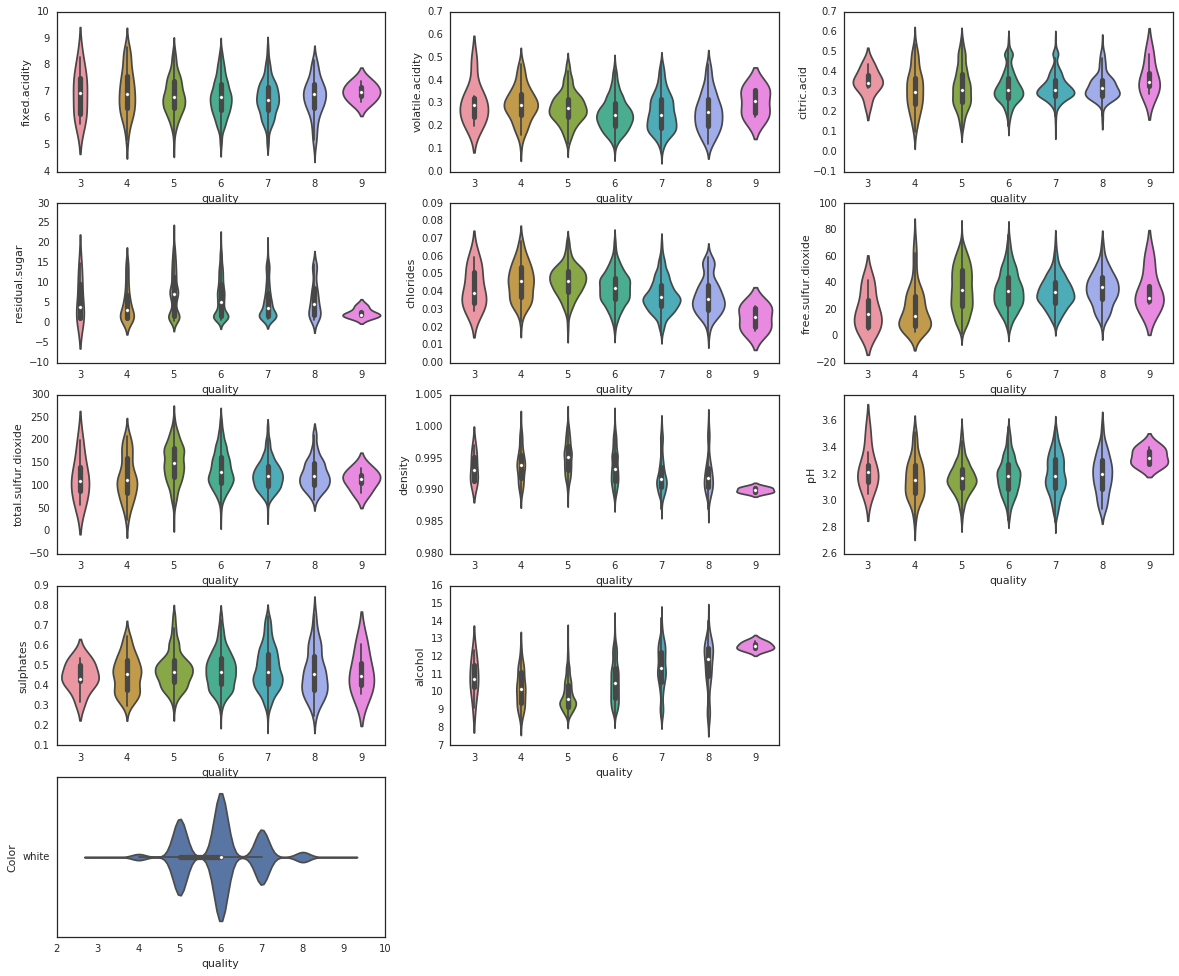

In [45]:
plt.figure(figsize=(20,20))
for column_index, column in enumerate(df.columns):
    if column == 'quality':
        continue
    plt.subplot(6,3,column_index + 1)
    sb.violinplot(x='quality',y=column, data=df)
plt.show()

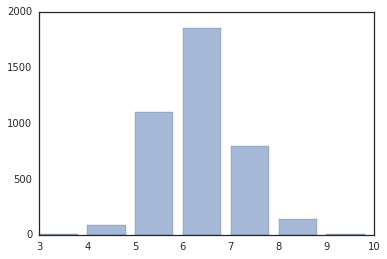

In [46]:
%matplotlib inline
features = ["fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density" ,"pH", "sulphates", "alcohol", "Color"]
num_features = ["fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density" ,"pH", "sulphates", "alcohol"]
x = df[features]  ## select features
y = df["quality"]  ## our target is quality

plt.bar(set(y), df.groupby(["quality"]).count().iloc[:,0], label = "Quality Distribution", alpha=0.5)
None



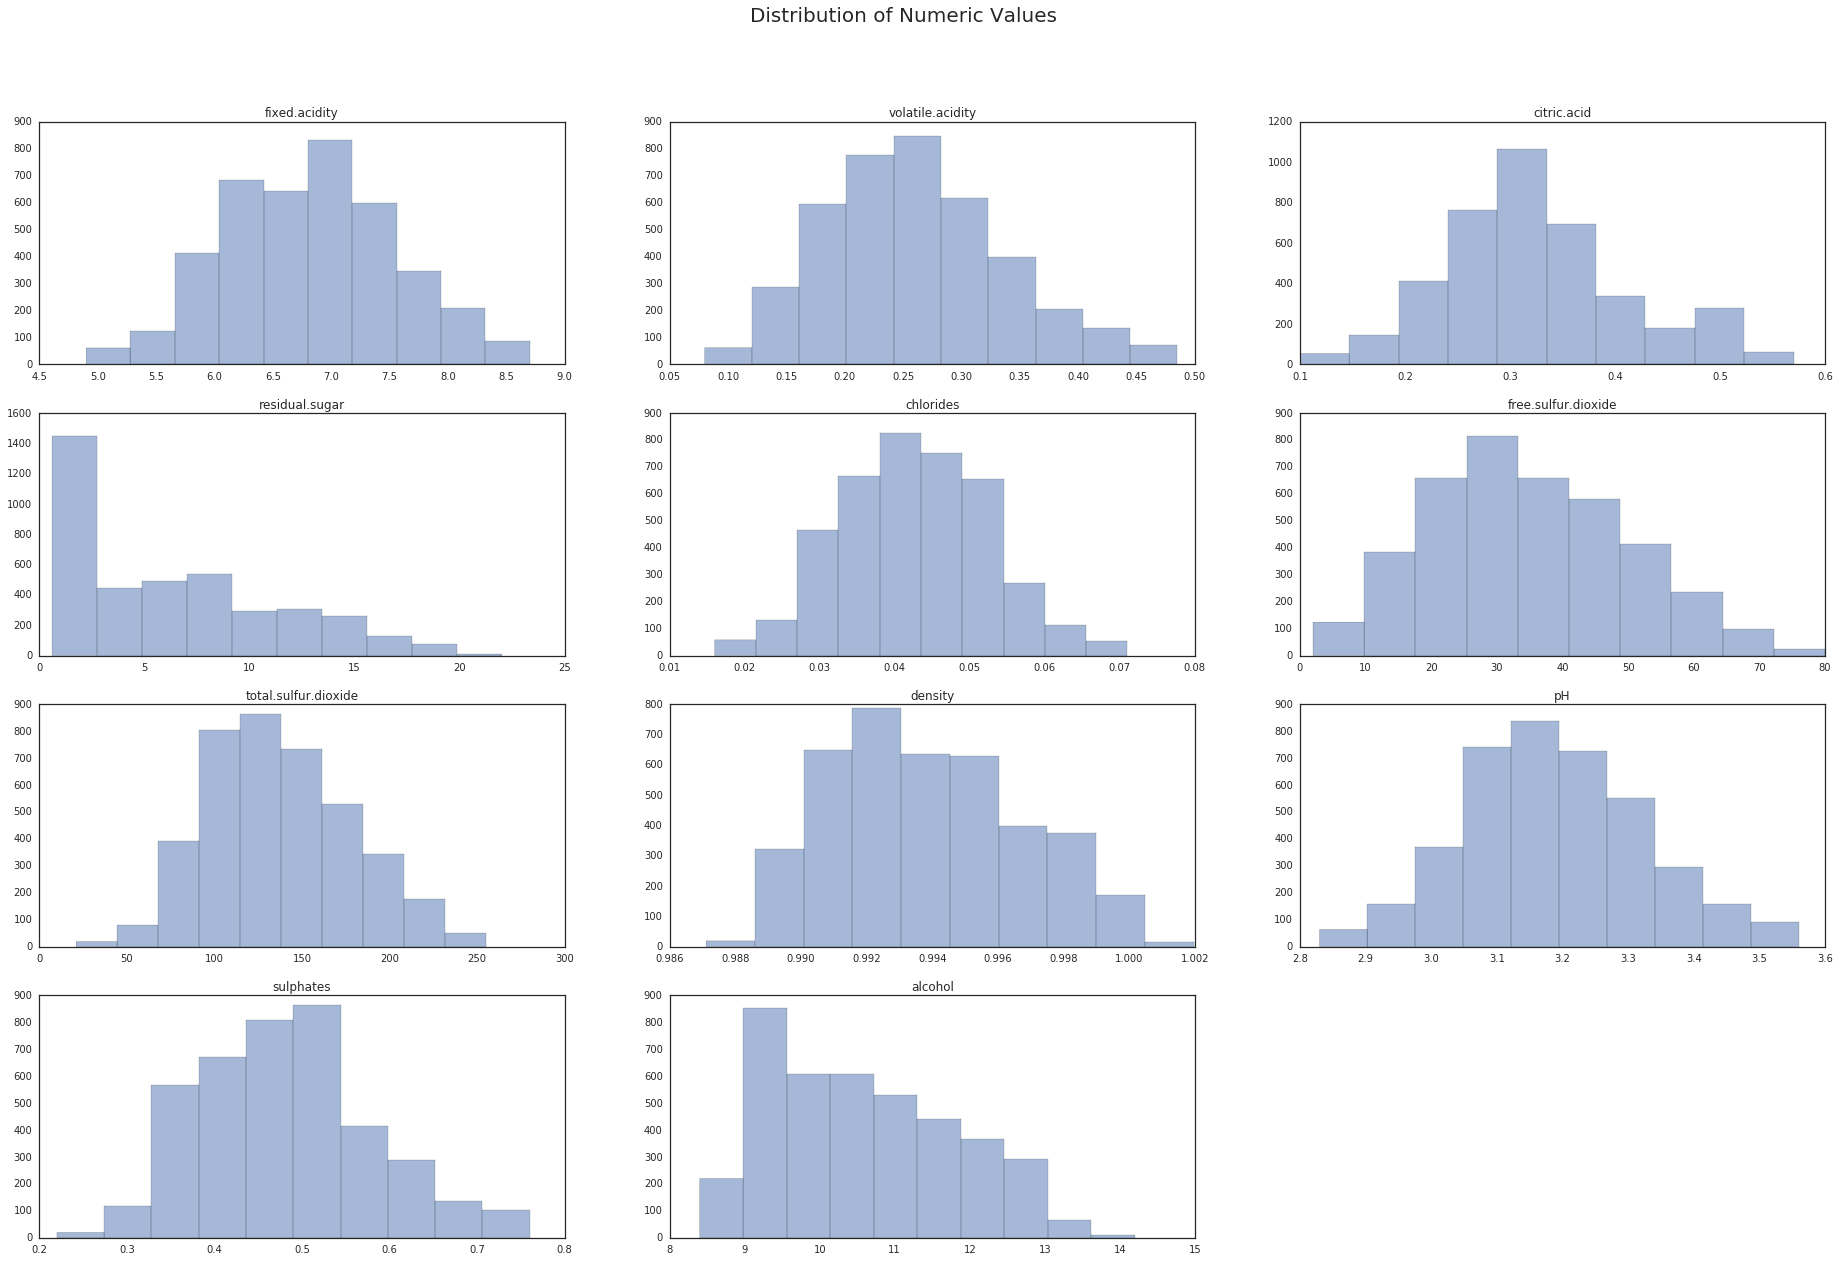

In [47]:
%matplotlib inline
fig = plt.figure(figsize=(32, 20))
for i in range(len(num_features)):
    f = list(num_features)[i]
    plt.subplot(4, 3, i+1)
    hst = plt.hist(df[f], alpha=0.5)
    plt.title(f)
plt.suptitle('Distribution of Numeric Values', fontsize=20)
None



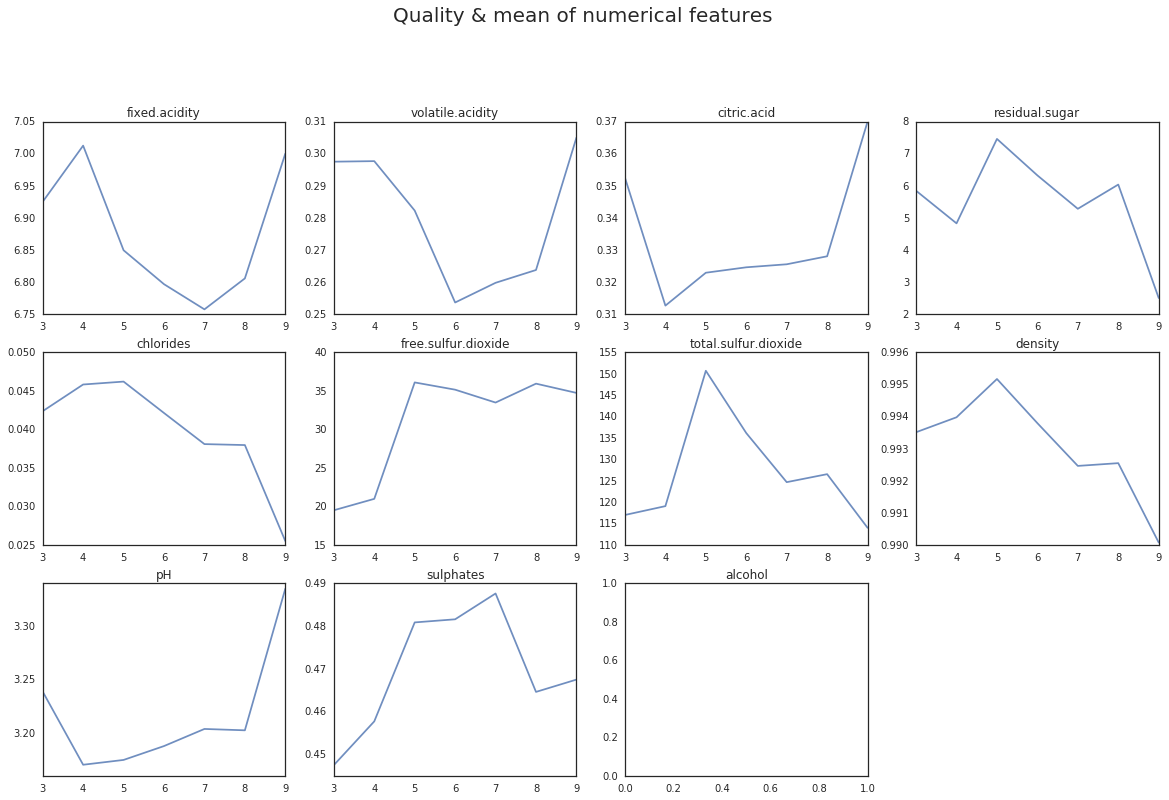

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
for i in range(len(num_features)):
    plt.plot(df.groupby(["quality"]).mean().index, df.groupby(["quality"]).mean().iloc[:,i-1], label=(num_features[i-1]), alpha=0.8)
    plt.subplot(5, 4, i+1)
    plt.title(num_features[i])
plt.suptitle('Quality & mean of numerical features', fontsize=20)
None



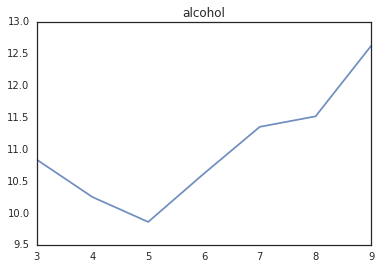

In [49]:
%matplotlib inline
plt.plot(df.groupby(["quality"]).mean().index, df.groupby(["quality"]).mean().iloc[:,10], label=(num_features[10]), alpha=0.8)
plt.title(num_features[10])
None



In [48]:
X=df.iloc[:,0:11].values
y=df.iloc[:,11].astype('category')


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().transform(X_test)
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Ratio of correctly classified samples for:
	Training-set:	0.698247
	Test-set:	0.561327


Automatically created module for IPython interactive environment


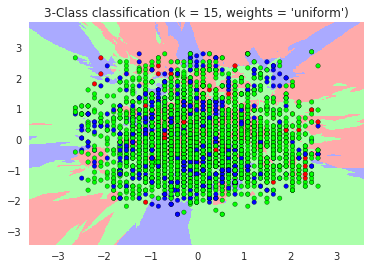

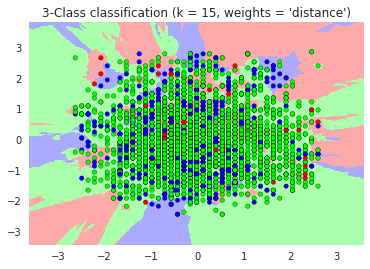

In [119]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# Fitting K-NN to the Training set
n_neighbors = 15
X = X[:, :2]  # we only take the first two features. We could
              # avoid this ugly slicing by using a two-dim dataset
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   3,   4,   1,   0,   0],
       [  1,  14, 262, 169,  21,   7,   0],
       [  3,  12, 150, 500, 164,  29,   1],
       [  0,   1,  18,  76, 127,  20,   0],
       [  0,   0,   1,   3,   3,   5,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [9]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.10      0.27      0.15        11
          5       0.60      0.55      0.58       474
          6       0.66      0.58      0.62       859
          7       0.40      0.52      0.46       242
          8       0.08      0.42      0.14        12
          9       0.00      0.00      0.00         0

avg / total       0.60      0.56      0.58      1598



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan', p = 2)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

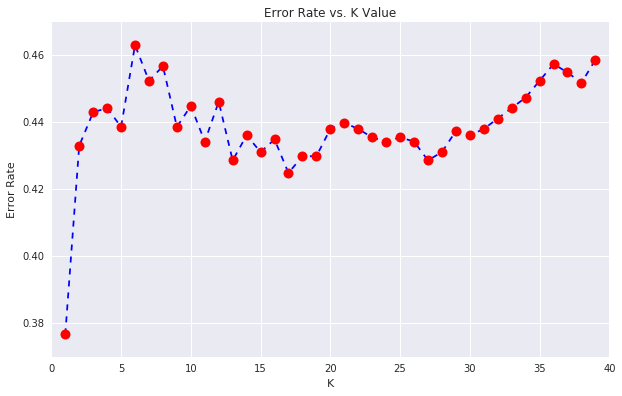

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=4
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[  0   0   2   2   0   0   0]
 [  0   2  12  13   3   0   0]
 [  0   5 266 145  17   1   0]
 [  0   4 179 490  76   3   0]
 [  0   1  24 159 128   4   0]
 [  0   0   5  31  20   5   0]
 [  0   0   0   1   0   0   0]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.17      0.07      0.10        30
          5       0.55      0.61      0.58       434
          6       0.58      0.65      0.62       752
          7       0.52      0.41      0.46       316
          8       0.38      0.08      0.14        61
          9       0.00      0.00      0.00         1

avg / total       0.54      0.56      0.54      1598



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=17
classifier = KNeighborsClassifier(n_neighbors=17)

classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[  0   0   2   2   0   0   0]
 [  0   0  12  17   1   0   0]
 [  0   0 261 164   9   0   0]
 [  0   0 145 552  53   2   0]
 [  0   0  15 191 109   1   0]
 [  0   0   3  29  29   0   0]
 [  0   0   0   1   0   0   0]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        30
          5       0.60      0.60      0.60       434
          6       0.58      0.73      0.65       752
          7       0.54      0.34      0.42       316
          8       0.00      0.00      0.00        61
          9       0.00      0.00      0.00         1

avg / total       0.54      0.58      0.55      1598



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
#Fiting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state=0)
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))


Ratio of correctly classified samples for:
	Training-set:	0.631052
	Test-set:	0.566959


In [70]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  1,  14, 247, 121,   8,   1,   0],
       [  3,  16, 184, 589, 238,  47,   1],
       [  0,   0,   3,  42,  70,  13,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [71]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.57      0.63      0.60       392
          6       0.78      0.55      0.64      1078
          7       0.22      0.55      0.32       128
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0

avg / total       0.69      0.57      0.61      1598



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [72]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [76]:
# May take awhile!
grid.fit(X,y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, kernel=rbf, gamma=1 ......................................
[CV] ............. C=0.1, kernel=rbf, gamma=1, score=0.464018 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ............. C=0.1, kernel=rbf, gamma=1, score=0.465064 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ............. C=0.1, kernel=rbf, gamma=1, score=0.465011 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ........... C=0.1, kernel=rbf, gamma=0.1, score=0.483508 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ........... C=0.1, kernel=rbf, gamma=0.1, score=0.514651 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ........... C=0.1, kernel=rbf, gamma=0.1, score=0.541761 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .......... C=0.1, kernel=rbf, gamma=0.01, score=0.482009 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .......... C=0.1, kernel=rbf, gamma=0.01, score=0.465064 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .......... C=0.1, kernel=rbf, gamma=0.01, score=0.465011 -   0.1s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [77]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [78]:
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[  0   0   1   3   0   0   0]
 [  0   0  15  15   0   0   0]
 [  0   0 277 155   2   0   0]
 [  0   0  95 628  29   0   0]
 [  0   0   5 223  88   0   0]
 [  0   0   1  43  17   0   0]
 [  0   0   0   1   0   0   0]]


In [79]:
print(classification_report(y_test,grid_predictions))



             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        30
          5       0.70      0.64      0.67       434
          6       0.59      0.84      0.69       752
          7       0.65      0.28      0.39       316
          8       0.00      0.00      0.00        61
          9       0.00      0.00      0.00         1

avg / total       0.60      0.62      0.58      1598



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
from sklearn import cross_validation
from sklearn import svm
# Split the iris data into train/test data sets with 40% reserved for testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

# Build an SVC model for predicting iris classifications using training data
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# Now measure its performance with the test data
clf.score(X_test, y_test)   

0.51814768460575722

In [94]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_validation.cross_val_score(clf, X, y, cv=5)
# Print the accuracy for each fold:
print (scores)
# And the mean accuracy of all 5 folds:
print (scores.mean())

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


[ 0.45  0.49  0.54  0.51  0.54]
0.507585197844


# Decision Tree 
Decision Tree classifiers are simple in theory. Decision Tree is a predictive model based on a branching series of Boolean tests on the data. A nice advantange about decision tree classifiers is that they are scale-invariant. Decsion tree classifiers doesn't need to scale the features of datasets.
There are some parameters that we can tune for decsion tree classifiers, but for now, we just use the basic decsion tree classifier(criterion ='entropy', max_depth=50) and sklearn.cross_validation.train_test_split to split the data to training set and testing set. we use precision, recall and the F1 scores to evalute each model. 

In [49]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.25, random_state=0)
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
Dtree = DecisionTreeClassifier(criterion='entropy',max_depth=50)
# Train the classifier on the training set
Dtree.fit(X_train, y_train)
# Validate the classifier on the testing set using classification accuracy
score_train =Dtree.score(X_train, y_train)
score_test = Dtree.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	1.000000
	Test-set:	0.587588


5 max_depth
score_test: 0.530530530531
20 max_depth
score_test: 0.592592592593
50 max_depth
score_test: 0.586586586587
100 max_depth
score_test: 0.584584584585
200 max_depth
score_test: 0.576576576577
 


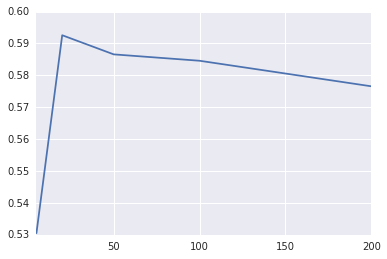

In [53]:
results = []
max_depths = [5,20,50,100,200]
for max_depth in max_depths:
    Dtree = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    Dtree.fit(X_train, y_train)
    print(max_depth, "max_depth")
    score_train =  Dtree.score(X_train, y_train)
    score_test =  Dtree.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results,max_depths).plot()

Evaluation: test how maximum Depth of tree impacts performance. we used the basic decsion tree classifier(criterion ='entropy', max_depth=50) and plot the score_reuslts to max_depth. The results is shown as the following, we fould that 50 of max_depth will have the best outcome. 


/usr/lib64/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


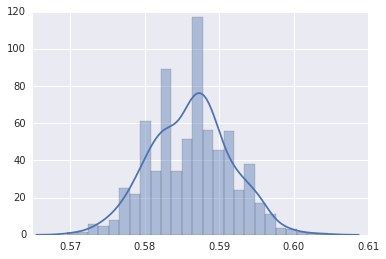

In [51]:
model_accuracies = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
    Dtree  = DecisionTreeClassifier(criterion='entropy')
    Dtree.fit(X_train, y_train)
    classifier_accuracy = Dtree.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)    
sb.distplot(model_accuracies)

we also did run the model 1000 times, our model can get anywhere from 57% to 61% accurary.

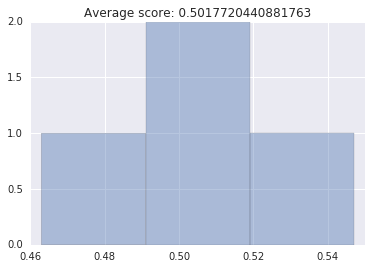

In [52]:
%matplotlib inline
from sklearn.cross_validation import cross_val_score
Dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(Dtree, X, y, cv=4)
sb.distplot(cv_scores,kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

As we know, models may classify the training set so well, but doesn't perform well on data set it hasn't seen before. we  used the sklearn pakage to do k-fold Cross-validation. we splited the origial data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. The process will repeat k times in which each subset is used as the testing set exactly once. we did 4-fold cross-validation and found the average score is a little bit less than previouly one. That indicates the model has overfitting phenomenen. 

In [56]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
Dtree = DecisionTreeClassifier()
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 10, 20, 50],
                  'max_features': [1, 2, 4, 8]}

cross_validation = StratifiedKFold(y, n_folds=5)
grid_search = GridSearchCV(Dtree,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
Dtree = grid_search.best_estimator_
Dtree

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Best score: 0.47921882824236356
Best parameters: {'max_features': 4, 'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

Bassially, after we build and run the model, we need do performance tunning by choosing different parameters. The sklearn contain the GridSearhCV page do parameter tunning and will give us the best settings for a handful of parameters.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot_ng as pydot
# Create the classifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(X_train,y_train)
dot_data = StringIO()  
export_graphviz(dtree,out_file=dot_data, feature_names=list(df.columns[:11]),filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
from IPython.display import HTML
HTML(str(graph.create_svg().decode('utf-8')))

In [17]:
graph.write_svg('mydt.svg')
graph.write_pdf('mydt.pdf')

True

We also re-used the code from homework 6 to print out the decision tree(level 4) and trace for each sample.

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.19      0.11      0.14        27
          5       0.61      0.65      0.62       262
          6       0.67      0.64      0.65       464
          7       0.58      0.62      0.60       210
          8       0.38      0.34      0.36        35
          9       0.00      0.00      0.00         0

avg / total       0.61      0.61      0.61       999



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


 we re-used the code from homework 6 to implemnet the decision tree model and print out the classification_report. As shown above, precision, recall and the F1 scores are used to evalutate the model. 

/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


[0.0, 0.0, 0.0]
[0.19, 0.11, 0.14]
[0.61, 0.65, 0.62]
[0.67, 0.64, 0.65]
[0.58, 0.62, 0.6]
[0.38, 0.34, 0.36]
[0.0, 0.0, 0.0]
plotMat: [[0.0, 0.0, 0.0], [0.19, 0.11, 0.14], [0.61, 0.65, 0.62], [0.67, 0.64, 0.65], [0.58, 0.62, 0.6], [0.38, 0.34, 0.36], [0.0, 0.0, 0.0]]
support: [1, 27, 262, 464, 210, 35, 0]


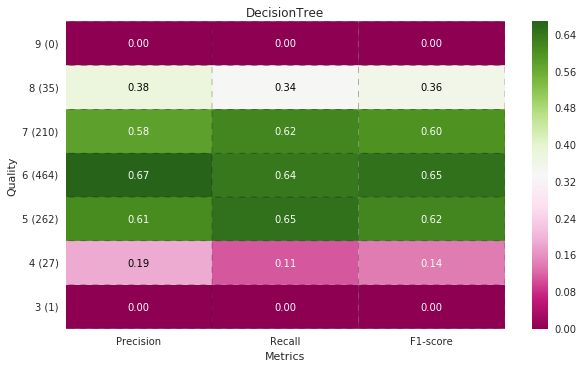

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''
    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)
    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)
    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

      # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))

def plot_classification_report(classification_report, title='DecisionTree', cmap='PiYG'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Quality'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

def main():
    plot_classification_report(classification_report(y_test,y_pred))
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.show()
if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

We used the code from the stackoverflow.com to draw the heapmap for classification_report. precision, recall and the F1 scores adn quality with different levels were indicated. 

Confusion matrix, without normalization
[[  0   0   1   0   0   0   0]
 [  0   4  14   6   2   1   0]
 [  1  12 164  73   9   3   0]
 [  0   8  73 296  73  13   1]
 [  0   1  16  58 131   4   0]
 [  0   0   1  12  10  12   0]
 [  0   0   0   0   0   0   0]]


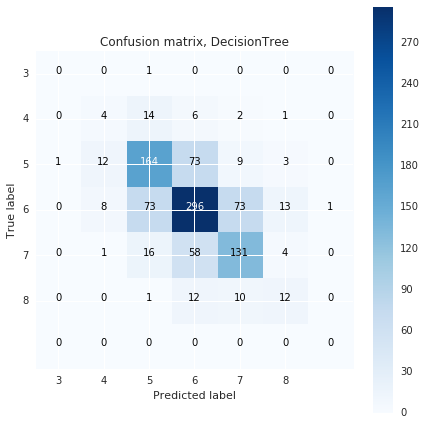

In [81]:
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8'],
                      title='Confusion matrix, DecisionTree')

# Plot normalized confusion matrix
#plt.figure(figsize=(10, 10))
#plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8'], normalize=True,
                      #title='Normalized confusion matrix')

plt.show()


We re-used the code from homework 6 to plot and print out the confision matrix for decison tree classifiers.

# Random Forest 
Random forest classifier is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees. Random forest classifiers have the decision trees work together to make a more accurate classification. 
There are some parameters that we can tune for Random forest classifiers, but for now, we just use the basic Random forest classifiers(criterion ='entropy', n_estimators=30) and sklearn.cross_validation.train_test_split to split the data to training set and testing set. we use precision, recall and the F1 scores to evalute each model. 

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=30,criterion='entropy')
rfc.fit(X_train,y_train)
score_train = rfc.score(X_train, y_train)
score_test = rfc.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.999666
	Test-set:	0.697698


In [31]:
rfc_pred = rfc.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  0   0   0   1   0   0]
 [  0   2  18   7   0   0]
 [  0   2 188  70   2   0]
 [  0   0  68 364  32   0]
 [  0   1   4  80 125   0]
 [  0   0   1   8  16  10]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.40      0.07      0.12        27
          5       0.67      0.72      0.70       262
          6       0.69      0.78      0.73       464
          7       0.71      0.60      0.65       210
          8       1.00      0.29      0.44        35

avg / total       0.69      0.69      0.68       999



/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


we did run the Random Forest model and print out the classfication_report. The precsion, recall fl-score were shown in the above output.

/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


[0.0, 0.0, 0.0]
[0.4, 0.07, 0.12]
[0.67, 0.72, 0.7]
[0.69, 0.78, 0.73]
[0.71, 0.6, 0.65]
[1.0, 0.29, 0.44]
plotMat: [[0.0, 0.0, 0.0], [0.4, 0.07, 0.12], [0.67, 0.72, 0.7], [0.69, 0.78, 0.73], [0.71, 0.6, 0.65], [1.0, 0.29, 0.44]]
support: [1, 27, 262, 464, 210, 35]


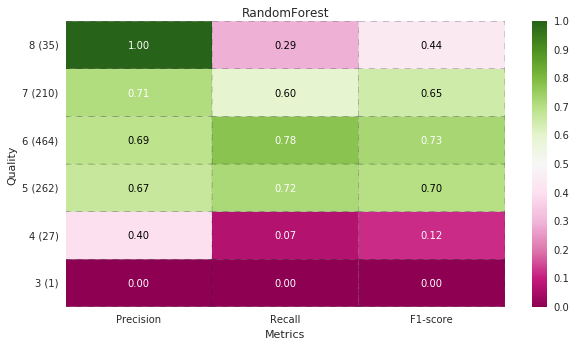

In [32]:
import matplotlib.pyplot as plt
import numpy as np 
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='RandomForest', cmap='PiYG'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Quality'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    plot_classification_report(classification_report(y_test,rfc_pred))
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.show()
if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

We used the codes from the stackoverflow.com to draw the heapmap for classification_report of random forest classificers. precision, recall, the F1 scores and quality with different levels are indicated.

Confusion matrix, without normalization
[[  0   0   1   0   0   0   0]
 [  0   4  14   6   2   1   0]
 [  1  12 164  73   9   3   0]
 [  0   8  73 296  73  13   1]
 [  0   1  16  58 131   4   0]
 [  0   0   1  12  10  12   0]
 [  0   0   0   0   0   0   0]]


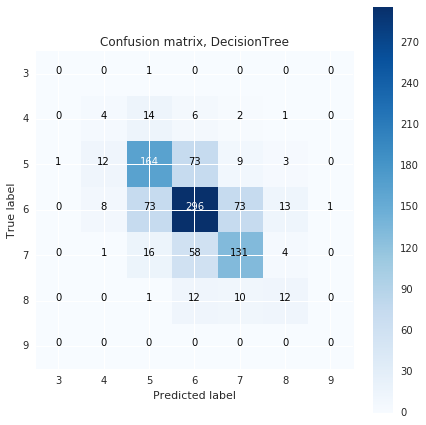

In [80]:
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8','9'],
                      title='Confusion matrix, DecisionTree')

# Plot normalized confusion matrix
#plt.figure(figsize=(10, 10))
#plot_confusion_matrix(cnf_matrix, classes=['3','4','5','6','7','8','9'], normalize=True,
                      #title='Normalized confusion matrix')

plt.show()


As we did on Decision tree classifiers, The confusion matrix for Random Forest classifiers also was created. The numbers in different quality levels were indicated. 

30 n_estimator
score_test: 0.710710710711
50 n_estimator
score_test: 0.700700700701
100 n_estimator
score_test: 0.692692692693
200 n_estimator
score_test: 0.707707707708
500 n_estimator
score_test: 0.6996996997
1000 n_estimator
score_test: 0.702702702703
2000 n_estimator
score_test: 0.705705705706
 


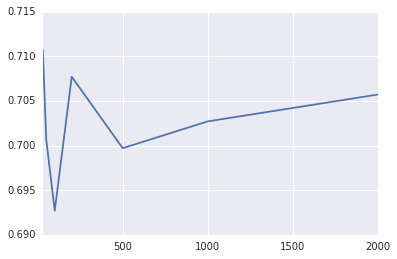

In [28]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
results = []
n_estimator_options = [30,50,100,200,500,1000,2000]
for n_estimator in n_estimator_options:
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=n_estimator)
    rfc.fit(X_train,y_train)
    print(n_estimator, "n_estimator")
    score_train = rfc.score(X_train, y_train)
    score_test = rfc.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results,n_estimator_options).plot()


we also test how n_estimators of Random Forest classifiers impacts performance. we used the basic Random Forest classifiers(criterion ='entropy') and plot the score_reuslts to n_estimators. We fould that 30 of n_estimators will have the best outcome.

In [38]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
results = []
max_features_options = ["auto",None,"sqrt","log2",0.9,0.2]
for max_features in max_features_options:
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features=max_features)
    rfc.fit(X_train,y_train)
    print(max_features, "max_features")
    score_train = rfc.score(X_train, y_train)
    score_test = rfc.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results)


auto max_features
score_test: 0.676676676677
None max_features
score_test: 0.658658658659
sqrt max_features
score_test: 0.674674674675
log2 max_features
score_test: 0.674674674675
0.9 max_features
score_test: 0.653653653654
0.2 max_features
score_test: 0.682682682683
 


0    0.676677
1    0.658659
2    0.674675
3    0.674675
4    0.653654
5    0.682683
dtype: float64

we also did optimize the parameter for max_features_options, we found when max_features_options is 0.2, the model will get the best performance. 

1 min_samples
score_test: 0.66966966967
2 min_samples
score_test: 0.668668668669
3 min_samples
score_test: 0.65965965966
4 min_samples
score_test: 0.653653653654
5 min_samples
score_test: 0.636636636637
6 min_samples
score_test: 0.652652652653
7 min_samples
score_test: 0.617617617618
8 min_samples
score_test: 0.61961961962
9 min_samples
score_test: 0.633633633634
10 min_samples
score_test: 0.613613613614
 


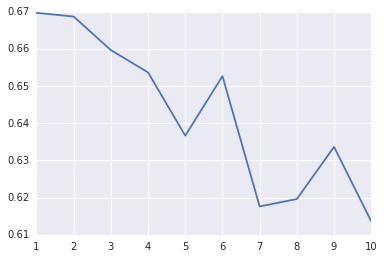

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
results = []
min_samples_leaf_options=[1,2,3,4,5,6,7,8,9,10]
for min_samples in min_samples_leaf_options:
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features="auto", min_samples_leaf=min_samples)
    rfc.fit(X_train,y_train)
    print(min_samples, "min_samples")
    score_train = rfc.score(X_train, y_train)
    score_test = rfc.score(X_test, y_test)
    print("score_test:", score_test)
    results.append(score_test)
print(" ")
pd.Series(results,min_samples_leaf_options).plot()


we also did optimize the parameter for min_samples_leaf, we found when min_samples_leaf is 1, the model will get the best performance. 

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features="auto", min_samples_leaf=1)
rfc.fit(X_train,y_train)
score_train = rfc.score(X_train, y_train)
score_test = rfc.score(X_test, y_test)
print("score_train:", score_train)
print("score_test:", score_test)

score_train: 0.998664440735
score_test: 0.674674674675


We plugged the optimized parameters in RandomForestClassifiers and implemented it. The finaltested score was shown as the above. 

/usr/lib64/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


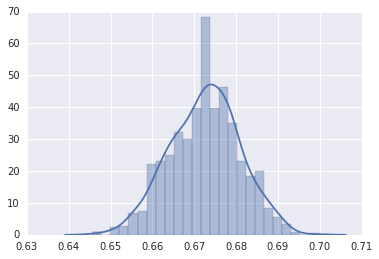

In [43]:
from sklearn.cross_validation import train_test_split
model_accuracies = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rfc=RandomForestClassifier(criterion='entropy',n_estimators=30, max_features="auto", min_samples_leaf=1)
    rfc.fit(X_train,y_train)
    classifier_accuracy = rfc.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)    
sb.distplot(model_accuracies)

we did run the model 1000 times with the optimized parameters, our model can get anywhere from 64% to 70% accurary.

Feature ranking:
1. feature 3 (0.206633)
2. feature 0 (0.176727)
3. feature 2 (0.162279)
4. feature 4 (0.118745)
5. feature 1 (0.106261)
6. feature 8 (0.046988)
7. feature 6 (0.046404)
8. feature 7 (0.046142)
9. feature 9 (0.045775)
10. feature 5 (0.044046)


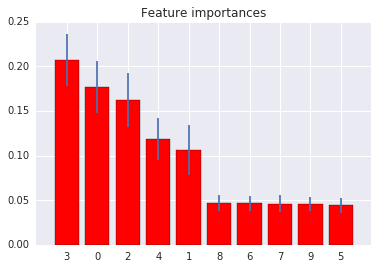

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=2000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="R", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

we also used the random forests classifiers to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability. As expected, the plot suggests that 5 features are informative, while the remaining are not.